# 6.5 Unsupervised Machine Learning 

### Content:

1. Importing libraries and data
2. Data cleaning
3. Elbow technique
4. K-means clustering
5. Descriptive analysis

### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [4]:
%matplotlib inline

In [5]:
df_accidents = pd.read_pickle('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/accidents_clean.pkl')

### 2. Data cleaning


In [6]:
#creating a new subset with necessary columns:

subset = df_accidents[[
        'Distance(mi)',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)']]

In [7]:
#imputing missing values
subset['Precipitation(in)'].fillna(subset['Precipitation(in)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_650/3090418467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Precipitation(in)'].fillna(subset['Precipitation(in)'].mean(), inplace=True)


In [8]:
subset['Humidity(%)'].fillna(subset['Humidity(%)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_650/1077046684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Humidity(%)'].fillna(subset['Humidity(%)'].mean(), inplace=True)


In [9]:
subset['Pressure(in)'].fillna(subset['Pressure(in)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_650/2724456775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Pressure(in)'].fillna(subset['Pressure(in)'].mean(), inplace=True)


In [10]:
subset['Visibility(mi)'].fillna(subset['Visibility(mi)'].mean(), inplace=True)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_650/447617672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Visibility(mi)'].fillna(subset['Visibility(mi)'].mean(), inplace=True)


### 3. Elbow technique


In [11]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))]

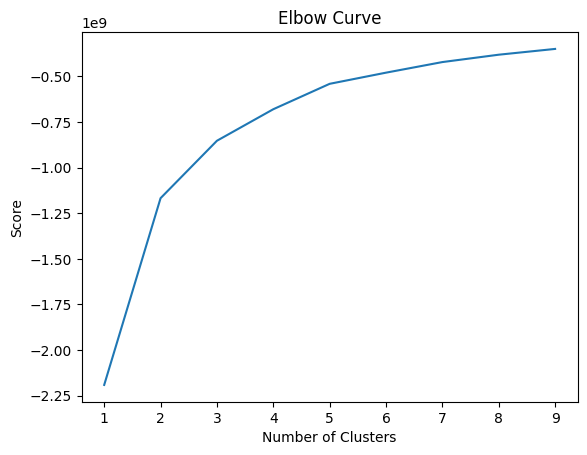

In [13]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [14]:
score

[-2190701390.747959,
 -1167617831.4603662,
 -853064732.131511,
 -680285603.7110965,
 -541103243.3329298,
 -479953959.8160223,
 -421949854.74455094,
 -381558105.34474695,
 -349896859.6365629]

### 4. K-means clustering

In [15]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [16]:
#fitting the subset onto kmeans object
kmeans.fit(subset)

KMeans(n_clusters=5)

In [17]:
#creating a column for clusters
subset['clusters'] = kmeans.fit_predict(subset)

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_650/100664328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['clusters'] = kmeans.fit_predict(subset)


In [18]:
subset.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),clusters
0,3.230,42.1,58.0,29.76,10.0,10.4,0.000000,0
4,0.500,37.0,93.0,29.69,10.0,10.4,0.010000,3
5,1.427,35.6,100.0,29.66,10.0,8.1,0.005884,3
7,0.521,33.1,92.0,29.63,0.5,3.5,0.080000,3
8,0.491,39.0,70.0,29.59,10.0,11.5,0.005884,3


In [19]:
subset['clusters'].value_counts()

4    630635
2    537831
3    438006
0    398713
1    370514
Name: clusters, dtype: int64

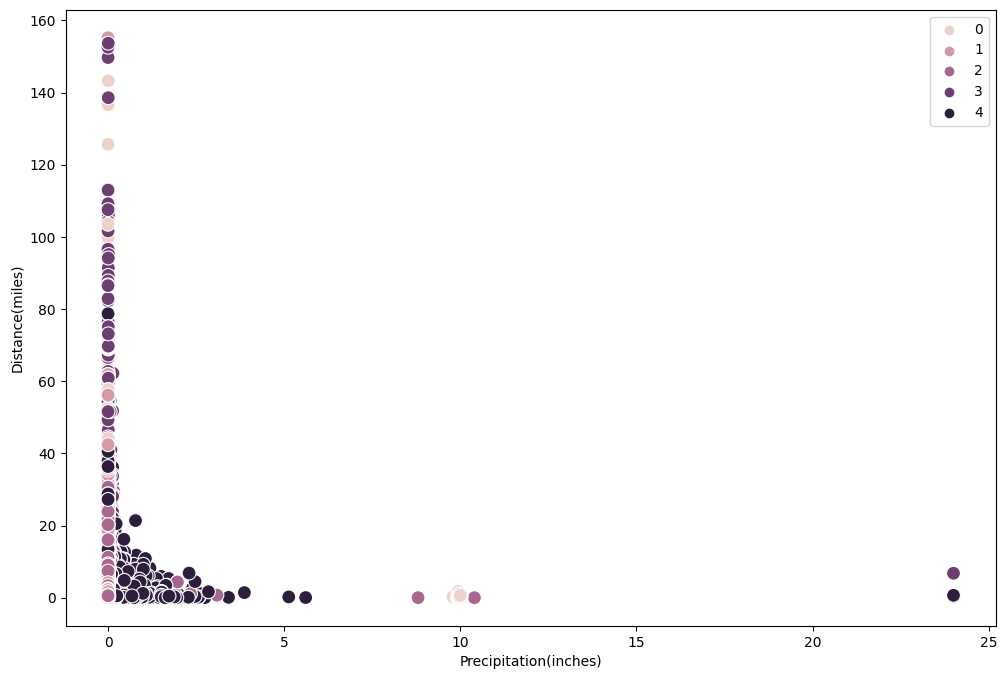

In [20]:
# Plotting the clusters for the "Precipitation" and "Distance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['Precipitation(in)'], y=subset['Distance(mi)'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Precipitation(inches)') # Label x-axis.
plt.ylabel('Distance(miles)') # Label y-axis.
plt.show()

In [21]:
#creating column for cluster colors
subset.loc[subset['clusters'] == 4, 'cluster'] = 'dark purple'
subset.loc[subset['clusters'] == 3, 'cluster'] = 'medium purple'
subset.loc[subset['clusters'] == 2, 'cluster'] = 'purple'
subset.loc[subset['clusters'] == 1, 'cluster'] = 'light purple'
subset.loc[subset['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/wr/g61q8q917fn2js3wjfr08_0h0000gn/T/ipykernel_650/3613867475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[subset['clusters'] == 4, 'cluster'] = 'dark purple'


In [22]:
#descriptive statistics for each cluster
subset.groupby('cluster').agg({'Distance(mi)':['mean', 'median'], 
                        'Temperature(F)':['mean', 'median'], 
                         'Humidity(%)':['mean', 'median'],
                          'Pressure(in)':['mean', 'median'],
                              'Visibility(mi)':['mean', 'median'],
                            'Wind_Speed(mph)':['mean', 'median'],
                            'Precipitation(in)':['mean', 'median']})

Distance(mi)        Temperature(F)        Humidity(%)         \
                      mean median           mean median        mean median   
cluster                                                                      
dark purple       0.671042  0.207      63.887951   63.0   85.370056   86.0   
light purple      0.647385  0.168      77.006413   77.0   27.735737   29.0   
medium purple     0.875361  0.303      34.466595   36.0   83.954525   85.0   
pink              0.700946  0.238      48.139738   50.0   51.382625   52.0   
purple            0.630168  0.185      77.521993   78.0   59.542965   60.0   

              Pressure(in)        Visibility(mi)        Wind_Speed(mph)  \
                      mean median           mean median            mean   
cluster                                                                   
dark purple      29.657811  29.83       8.318099   10.0        5.680122   
light purple     28.939271  29.39       9.885886   10.0        8.162694   
medium purple    29.117347  29.57       7.664952   10.0        6.568580   
pink             29.282583  29.71       9.958910   10.0        7.639050   
purple           29.681686  29.86       9.813707   10.0        8.485667   

                     Precipitation(in)         
              median              mean median  
cluster                                        
dark purple      5.0          0.015456    0.0  
light purple     8.0          0.000397    0.0  
medium purple    6.0          0.007108    0.0  
pink             7.0          0.001434    0.0  
purple           8.0          0.000744    0.0

##### K-means clustering on a new subset without the extreme values

In [23]:
#importing a version of dataset with fewer extreme values
sub2 = pd.read_pickle('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/no_extreme_subset.pkl')

In [24]:
sub2 = sub2 [['Distance(mi)',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)']]

In [25]:
#removing extreme values
sub2 = sub2[sub2['Visibility(mi)'] <= 12]

In [26]:
sub2.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3.230,42.1,58.0,29.76,10.0,10.4,0.000000
4,0.500,37.0,93.0,29.69,10.0,10.4,0.010000
5,1.427,35.6,100.0,29.66,10.0,8.1,0.005884
7,0.521,33.1,92.0,29.63,0.5,3.5,0.080000
8,0.491,39.0,70.0,29.59,10.0,11.5,0.005884


In [27]:
#Scaling the dataset
scaler = StandardScaler()

In [30]:
columns = ['Distance(mi)',
        'Temperature(F)',
        'Humidity(%)',
        'Pressure(in)',
        'Visibility(mi)',
        'Wind_Speed(mph)',
        'Precipitation(in)']

In [33]:
sub3 = pd.DataFrame(scaler.fit_transform(sub2), columns = columns)
sub3.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2.468336,-0.996280,-0.289084,0.338034,0.418585,0.582038,-0.145838
1,-0.132035,-1.265140,1.246651,0.273514,0.418585,0.582038,0.116422
2,0.750948,-1.338944,1.553798,0.245862,0.418585,0.165360,0.008488
3,-0.112032,-1.470738,1.202773,0.218211,-3.628751,-0.667995,1.952239
4,-0.140608,-1.159705,0.237454,0.181342,0.418585,0.781319,0.008488


In [37]:
#Elbow technique for the new dataset
num_c2 = range(1, 10) 
kmeans2 = [KMeans(n_clusters=i) for i in num_c2]

In [38]:
score2 = [kmeans2[i].fit(sub3).score(sub3) for i in range(len(kmeans2))]

In [39]:
score2

[-16499209.999999965,
 -13785483.077032972,
 -11904412.029123843,
 -10509116.844642002,
 -9279371.957664356,
 -8035663.362659614,
 -7389375.025443062,
 -6883786.58641799,
 -6459452.599592741]

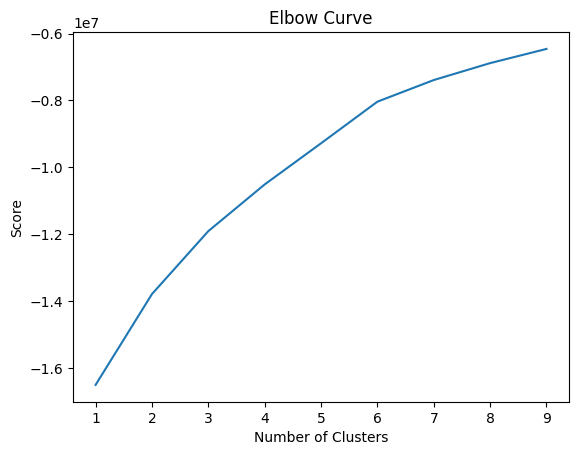

In [40]:
pl.plot(num_c2,score2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [41]:
kmeans2 = KMeans(n_clusters = 3) 

In [42]:
kmeans2.fit(sub3)

KMeans(n_clusters=3)

In [43]:
sub3 = sub2.reset_index().rename(columns = {'index': 'id'})
sub3.head()

,id,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0,3.230,42.1,58.0,29.76,10.0,10.4,0.000000
1,4,0.500,37.0,93.0,29.69,10.0,10.4,0.010000
2,5,1.427,35.6,100.0,29.66,10.0,8.1,0.005884
3,7,0.521,33.1,92.0,29.63,0.5,3.5,0.080000
4,8,0.491,39.0,70.0,29.59,10.0,11.5,0.005884


In [44]:
sub3['clusters'] = kmeans2.fit_predict(sub3)

In [45]:
sub3

,id,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),clusters
0,0,3.230,42.1,58.0,29.76,10.0,10.4,0.000000,1
1,4,0.500,37.0,93.0,29.69,10.0,10.4,0.010000,1
2,5,1.427,35.6,100.0,29.66,10.0,8.1,0.005884,1
3,7,0.521,33.1,92.0,29.63,0.5,3.5,0.080000,1
4,8,0.491,39.0,70.0,29.59,10.0,11.5,0.005884,1
...,...,...,...,...,...,...,...,...,...
2357025,2845337,0.543,86.0,40.0,28.92,10.0,13.0,0.000000,2
2357026,2845338,0.338,70.0,73.0,29.39,10.0,6.0,0.000000,2
2357027,2845339,0.561,73.0,64.0,29.74,10.0,10.0,0.000000,2
2357028,2845340,0.772,71.0,81.0,29.62,10.0,8.0,0.000000,2


In [46]:
sub3['clusters'].value_counts()

0    806711
1    797213
2    753106
Name: clusters, dtype: int64

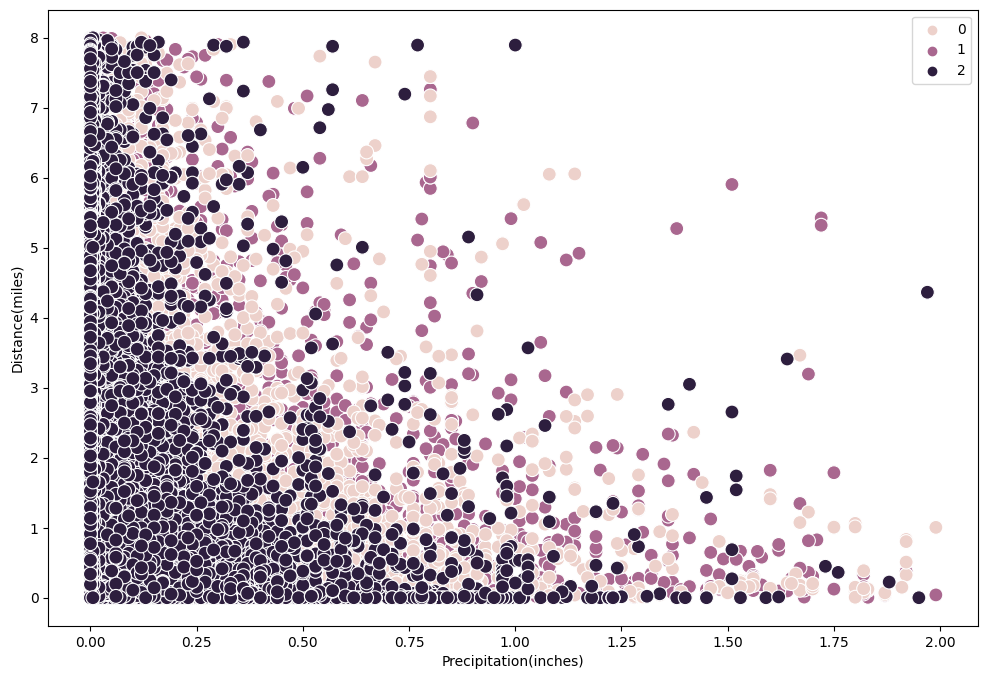

In [47]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub3['Precipitation(in)'], y=sub3['Distance(mi)'], hue=kmeans2.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Precipitation(inches)') # Label x-axis.
plt.ylabel('Distance(miles)') # Label y-axis.
plt.show()

Based on the chart, most data points that had a longer distance affected by the accident happened in low to moderate amount of precipitation. 
The second group (dark purple data points) with slightly higher precipitation are positioned slightly above the first group and involved a longer road extent.
The third group, light pink data points, happened considerably less than the other two groups but had longer distances affected with higher precipitation.

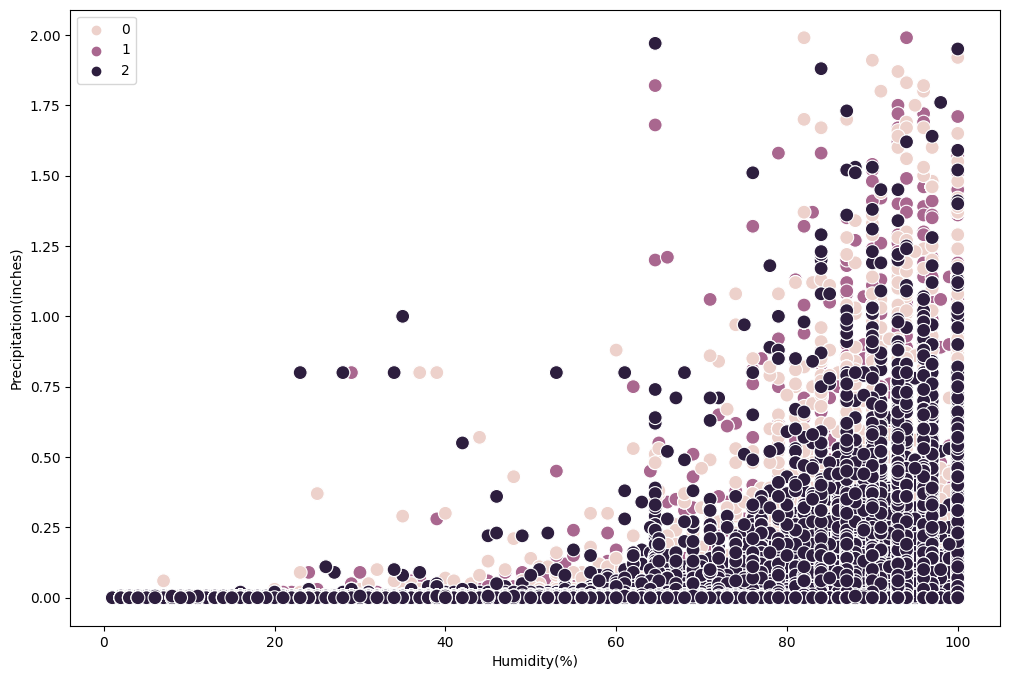

In [48]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub3['Humidity(%)'], y=sub3['Precipitation(in)'], hue=kmeans2.labels_, s=100) 

ax.grid(False)
plt.xlabel('Humidity(%)') 
plt.ylabel('Precipitation(inches)') 
plt.show()

All three clusters show that high humidity tends to be associated with higher precipitation. 

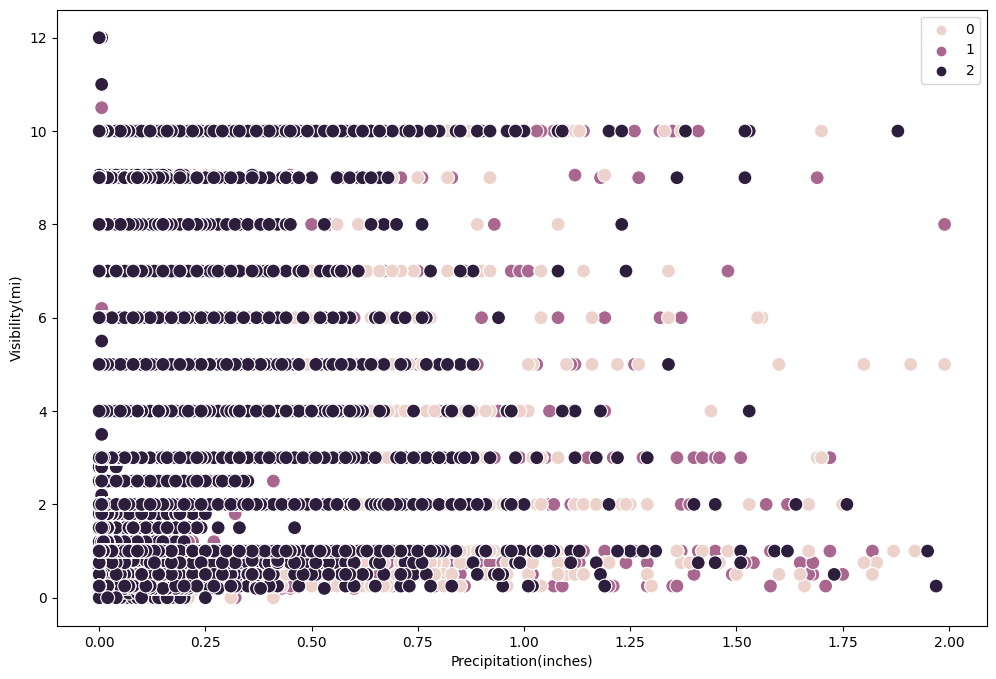

In [49]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub3['Precipitation(in)'], y=sub3['Visibility(mi)'], hue=kmeans2.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Precipitation(inches)') 
plt.ylabel('Visibility(mi)') 
plt.show()

There are fewer data points (light pink and dark purple) that show high visibility when precipitation is high. Most data points belong to group 1 (purple points) which show a visibility of less than one mile with high precipitation.

### 5. Descriptive analysis

In [50]:
sub3.loc[sub3['clusters'] == 4, 'cluster'] = 'dark purple'
sub3.loc[sub3['clusters'] == 3, 'cluster'] = 'medium purple'
sub3.loc[sub3['clusters'] == 2, 'cluster'] = 'purple'
sub3.loc[sub3['clusters'] == 1, 'cluster'] = 'light purple'
sub3.loc[sub3['clusters'] == 0, 'cluster'] = 'pink'

In [51]:
sub3.groupby('cluster').agg({'Distance(mi)':['mean', 'median'], 
                            'Precipitation(in)':['mean', 'median'],
                            'Visibility(mi)':['mean', 'median'],
                             'Humidity(%)':['mean', 'median'],
                        'Temperature(F)':['mean', 'median'], 
                          'Pressure(in)':['mean', 'median'],
                            'Wind_Speed(mph)':['mean', 'median']})

Distance(mi)        Precipitation(in)        Visibility(mi)  \
                     mean median              mean median           mean   
cluster                                                                    
light purple     0.764222  0.307          0.006044    0.0       9.097045   
pink             0.733934  0.282          0.004995    0.0       8.964227   
purple           0.403555  0.032          0.005655    0.0       8.990323   

                    Humidity(%)        Temperature(F)        Pressure(in)  \
             median        mean median           mean median         mean   
cluster                                                                     
light purple   10.0   63.947790   66.0      65.066324   68.0    29.415398   
pink           10.0   65.966453   69.0      59.475985   61.0    29.416872   
purple         10.0   63.790177   67.0      58.323278   59.0    29.344524   

                    Wind_Speed(mph)         
             median            mean median  
cluster                                     
light purple  29.76        7.214808    7.0  
pink          29.75        7.017048    7.0  
purple        29.74        7.340348    7.0

In [53]:
#Exporting subset with clusters 
sub3.to_csv('/Users/tiaoshrieh/Desktop/US accidents project 5-23/02 Data/Prepared data/subset_with_clusters.csv')